# ONLINE FOOD RE-ORDER PREDICTION 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
data = pd.read_csv("onlinefoods.csv")

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


## Getting overall statistics

In [5]:
data.shape

(388, 13)

In [6]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 388
Number of columns: 13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [8]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [9]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## Check null values

In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

## Check for duplicates


In [11]:
data.duplicated().sum()

103

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(285, 13)

## Drop unnecessary columns

In [16]:
data = data.drop("Unnamed: 12",axis=1)

In [17]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


# 

## BASIC VISUALIZATION

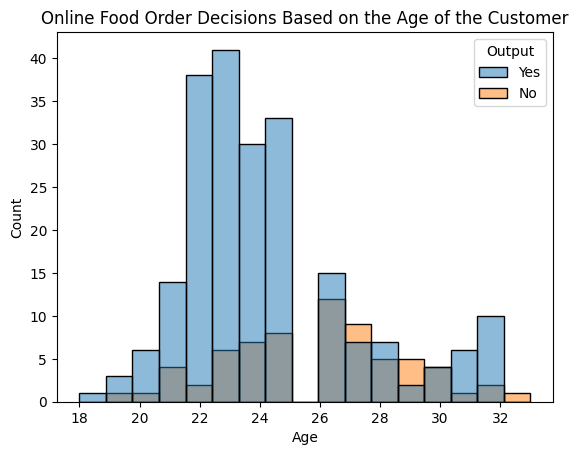

In [18]:
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

###  We can see that the age group of 22-25 orders the food often again.

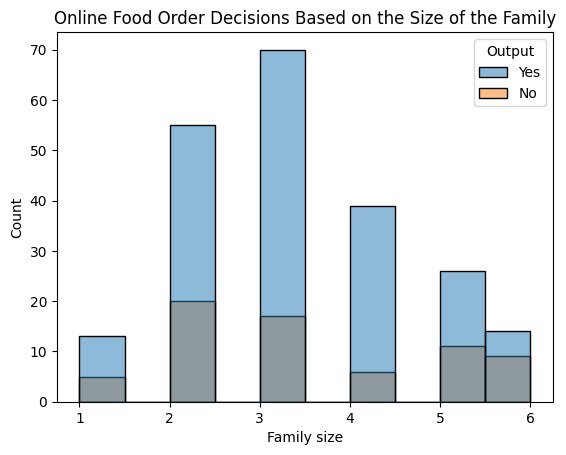

In [19]:
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

### Families with 2 and 3 members are ordering food often

In [20]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


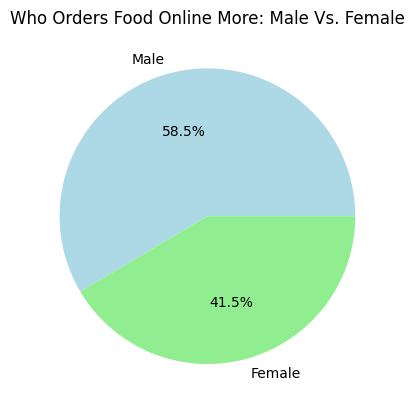

In [21]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['lightblue', 'lightgreen']
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%')
plt.title('Who Orders Food Online More: Male Vs. Female')
plt.show()

###  Male customers are ordering more compared the females

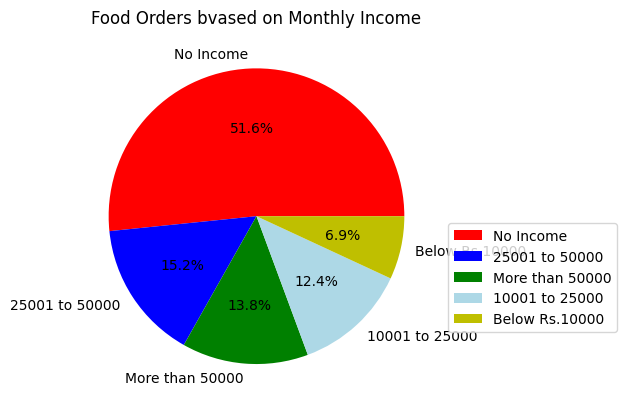

In [22]:
MonthlyIncome = buying_again_data["Monthly Income"].value_counts()
label = MonthlyIncome.index
counts = MonthlyIncome.values
colors = ['r', 'b', 'g', 'lightblue', 'y']
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%')
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.title('Food Orders bvased on Monthly Income')
plt.show()


### According to the above figure, 54% of the customers don’t fall under any income group.

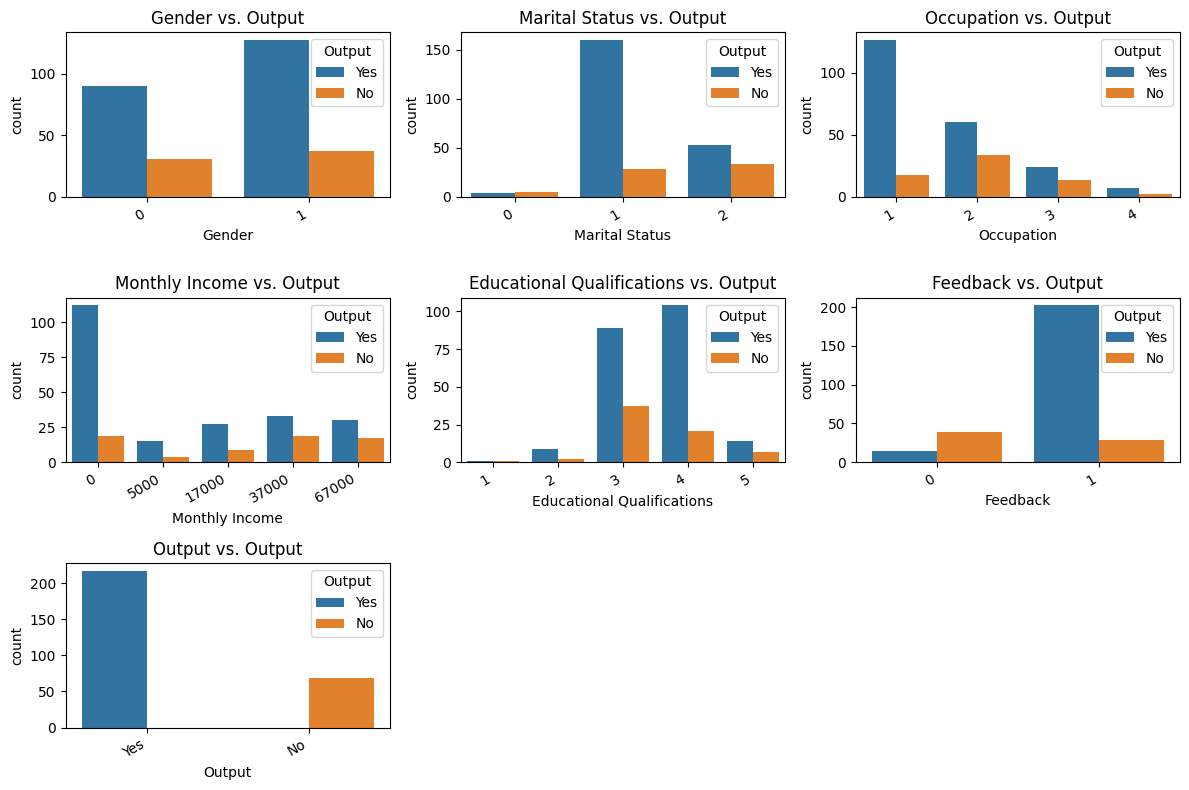

In [91]:
non_numeric_columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
                       'Educational Qualifications', 'Feedback', 'Output']

plt.figure(figsize=(12, 8))
for i, column in enumerate(non_numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column, hue='Output')
    plt.xticks(rotation=30, ha='right')
    plt.title(f'{column} vs. Output')
plt.tight_layout()
plt.show()

# 

# Encoding Categorical Values

In [24]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

In [26]:
data.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,0,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive


In [27]:
data["Marital Status"].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [28]:
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})

In [29]:
data["Occupation"].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [30]:
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})

In [31]:
data.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,0,1,1,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive


In [31]:
data["Educational Qualifications"].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [32]:
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 3, 
                                                                             "Post Graduate": 4, 
                                                                             "Ph.D": 5, "School": 2, 
                                                                             "Uneducated": 1})

In [33]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [35]:
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "Below Rs.10000": 5000,
                                                     "10001 to 25000": 17000,
                                                     "25001 to 50000": 37000, 
                                                     "More than 50000": 67000
                                                     })

In [36]:
data.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,4,4,12.9766,77.5993,560001,Yes,Positive
1,24,0,1,1,5000,3,3,12.9770,77.5773,560009,Yes,Positive
2,22,1,1,1,5000,4,3,12.9551,77.6593,560017,Yes,Negative
3,22,0,1,1,0,3,6,12.9473,77.5616,560019,Yes,Positive
4,22,1,1,1,5000,4,4,12.9850,77.5533,560010,Yes,Positive


In [37]:
data["Feedback"].unique()

array(['Positive', 'Negative '], dtype=object)

In [38]:
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})

In [39]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,1,1,0,4,4,12.9766,77.5993,560001,Yes,1
1,24,0,1,1,5000,3,3,12.9770,77.5773,560009,Yes,1
2,22,1,1,1,5000,4,3,12.9551,77.6593,560017,Yes,0
3,22,0,1,1,0,3,6,12.9473,77.5616,560019,Yes,1
4,22,1,1,1,5000,4,4,12.9850,77.5533,560010,Yes,1


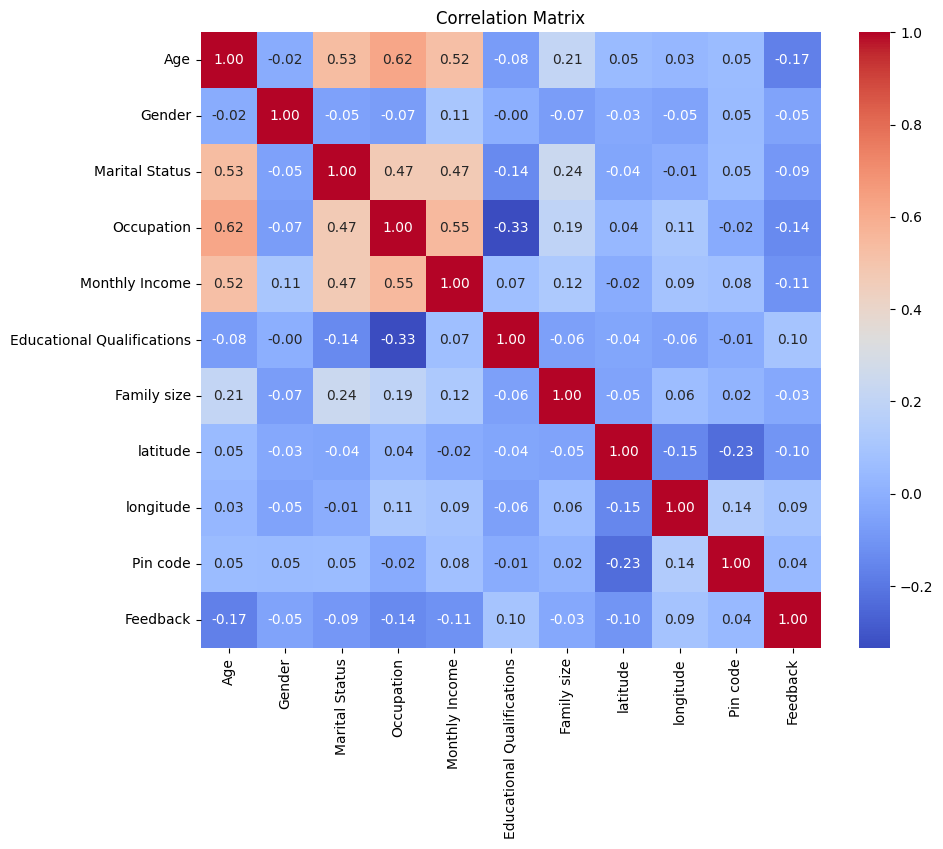

In [92]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# 

## SPLITING THE DATASET

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

# 

## IMPORTING MODELS

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# 

## MODEL TRAINING

In [45]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

C:\Users\Preya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [46]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

C:\Users\Preya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
svm = SVC()
svm.fit(xtrain, ytrain)

C:\Users\Preya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [48]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)

C:\Users\Preya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [49]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [50]:
ypred1 = rfc.predict(xtest)
ypred2 = lr.predict(xtest)
ypred3 = gb.predict(xtest)
ypred4 = dt.predict(xtest)
ypred5 = svm.predict(xtest)

## Accuracy

In [51]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(ytest,ypred1)
score2=accuracy_score(ytest,ypred2)
score3=accuracy_score(ytest,ypred3)
score4=accuracy_score(ytest,ypred4)
score5=accuracy_score(ytest,ypred5)

In [77]:
print("Random Forest Classifier:",score1)
print("Logistic Regression:",score2)
print("Gradient Boosting Classifier:",score3)
print("Decision Tree Classifier:",score4)
print("Support Vector machine:",score5)

Random Forest Classifier: 0.8620689655172413
Logistic Regression: 0.7931034482758621
Gradient Boosting Classifier: 0.8620689655172413
Decision Tree Classifier: 0.6896551724137931
Support Vector machine: 0.7931034482758621


## Cross Validation Score

In [80]:
from sklearn.model_selection import cross_val_score
y = y.ravel()
cross1 = cross_val_score(rfc,x,y,cv=10)
cross2 = cross_val_score(lr,x,y,cv=10)
cross3 = cross_val_score(gb,x,y,cv=10)
cross4 = cross_val_score(dt,x,y,cv=10)
cross5 = cross_val_score(svm,x,y,cv=10)

In [81]:
print("Random Forest Classifier:",np.mean(cross1))
print("Logistic Regression:",np.mean(cross2))
print("Gradient Boosting Classifier:",np.mean(cross3))
print("Decision Tree Classifier:",np.mean(cross4))
print("Support Vector machine:",np.mean(cross5))

Random Forest Classifier: 0.8035714285714285
Logistic Regression: 0.7614532019704433
Gradient Boosting Classifier: 0.7685960591133004
Decision Tree Classifier: 0.7323891625615764
Support Vector machine: 0.7614532019704433


In [82]:
final_data = pd.DataFrame({'Models':['Random Forest','Logistic Regression','Gradient Boost','Decision Tree Classifier','Support Vector Machine'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100],
            'CROSS_VAL_SCORE':[np.mean(cross1)*100,
                  np.mean(cross2)*100,
                  np.mean(cross3)*100,
                  np.mean(cross4)*100,
                  np.mean(cross5)*100]})
final_data

,Models,ACC,CROSS_VAL_SCORE
0,Random Forest,86.206897,80.357143
1,Logistic Regression,79.310345,76.145320
2,Gradient Boost,86.206897,76.859606
3,Decision Tree Classifier,68.965517,73.238916
4,Support Vector Machine,79.310345,76.145320


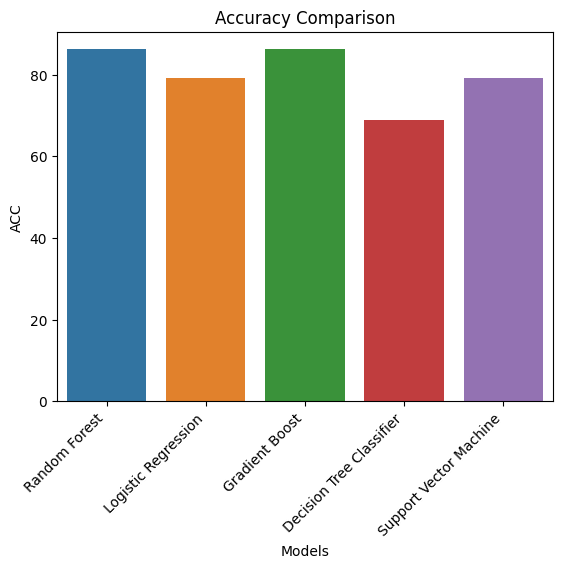

In [85]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy Comparison')
plt.show()

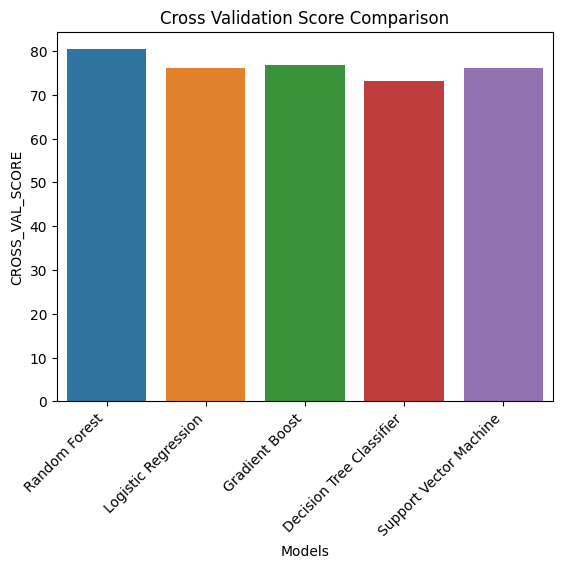

In [84]:
sns.barplot(x=final_data['Models'], y=final_data['CROSS_VAL_SCORE'])
plt.xticks(rotation=45, ha='right')
plt.title('Cross Validation Score Comparison')
plt.show()

## SAVE MODEL

In [ ]:
import joblib
joblib.dump(rfc, 'rfc_model.joblib')

# 

## PREDICT

In [86]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", rfc.predict(features))


Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 45
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 2
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Monthly Income: 760000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 2
Pin Code: 1
Review of the Last Order (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  ['No']


# GUI

In [88]:
from tkinter import *

def predict():
    
    #user inputs
    a = int(age_entry.get())
    b = int(gender_entry.get())
    c = int(marital_status_entry.get())
    d = int(occupation_entry.get())
    e = int(income_entry.get())
    f = int(education_entry.get())
    g = int(family_size_entry.get())
    h = int(pin_code_entry.get())
    i = int(review_entry.get())
    
    features = np.array([[a, b, c, d, e, f, g, h, i]])
    prediction = rfc.predict(features)
    result_label.config(text="Will order again: {}".format(prediction[0]))

# Create GUI
root = Tk()
root.title("Customer Order Prediction")

# Labels
Label(root, text="Enter Customer Details to Predict If the Customer Will Order Again").grid(row=0, columnspan=2)
Label(root, text="Age of the Customer:").grid(row=1, column=0)
Label(root, text="Gender (1 = Male, 0 = Female):").grid(row=2, column=0)
Label(root, text="Marital Status (1 = Single, 2 = Married, 3 = Not Revealed):").grid(row=3, column=0)
Label(root, text="Occupation (1 = Student, 2 = Employee, 3 = Self Employed, 4 = Housewife):").grid(row=4, column=0)
Label(root, text="Monthly Income:").grid(row=5, column=0)
Label(root, text="Educational Qualification (1 = Uneducated, 2 = School, 3 = Graduate, 4 = Post Graduate, 5 = Ph.D):").grid(row=6, column=0)
Label(root, text="Family Size:").grid(row=7, column=0)
Label(root, text="Pin Code:").grid(row=8, column=0)
Label(root, text="Review of the Last Order (1 = Positive, 0 = Negative):").grid(row=9, column=0)


age_entry = Entry(root)
age_entry.grid(row=1, column=1)
gender_entry = Entry(root)
gender_entry.grid(row=2, column=1)
marital_status_entry = Entry(root)
marital_status_entry.grid(row=3, column=1)
occupation_entry = Entry(root)
occupation_entry.grid(row=4, column=1)
income_entry = Entry(root)
income_entry.grid(row=5, column=1)
education_entry = Entry(root)
education_entry.grid(row=6, column=1)
family_size_entry = Entry(root)
family_size_entry.grid(row=7, column=1)
pin_code_entry = Entry(root)
pin_code_entry.grid(row=8, column=1)
review_entry = Entry(root)
review_entry.grid(row=9, column=1)


predict_button = Button(root, text="Predict", command=predict)
predict_button.grid(row=10, columnspan=2)


result_label = Label(root, text="")
result_label.grid(row=11, columnspan=2)

root.mainloop()
